# Random Walk

This code will simulate the *simple random walk*, which is one of the most important discrete-time stochastic process. Random walks are commonly used to model phenomena in physics,  chemistry, biology, and finance. In the simple random walk, at each timestep we flip a fair coin. If it lands on heads, we move foward one step and if it lands on tails, we move backwards instead. We will let "forwards" be represented by positive integers, and "backwards" be represented by negative integers.

In [1]:
import random             #imports random module

upper_bound = 10          #sets upper bound to 10
lower_bound = -10         #sets lower bound to -10
pos=0                     #sets the initial position to be at 0
x_results=[]              #creates empty list to store results of coin flips
positions=[]              #creates empty list to store position of the walk at each time step

#while loop to run simple random walk
while pos != lower_bound or pos != upper_bound:
    
    x = random.choice([-1,1])       #x will either be -1 or 1 by random choice
    x_results.append(x)             #the result of the "coin flip" will be stored in the list x_results
    
    #if statement to determine what to do depending on the "coin flip"
    if x == 1:                  #if x is 1
        pos+=1                  #we will move forward one step (add 1)
        positions.append(pos)   #append the current position to the list of positions
    elif x == -1:               #if x is -1
        pos-=1                  #we will move backward one step (subtract 1)
        positions.append(pos)   #append the current position to the list of positions
        
    #if statement to display message and terminate the walk when upper or lower bound is reached
    if pos == lower_bound:                                       #if lower bound is reached
        print("Lower bound at "+ str(lower_bound) + " reached")  #will print message that lower bound is reached
        break                                                    #exit the while loop
    elif pos == upper_bound:                                     #if upper bound is reached
        print("Upper bound at "+ str(upper_bound) + " reached")  #will print essage that upper bound is reached
        break                                                    #exit the while loop


Upper bound at 10 reached


In [2]:
# run this to check that positions list looks ok
positions

[1,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 4,
 5,
 4,
 3,
 4,
 5,
 6,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 4,
 3,
 2,
 3,
 4,
 5,
 4,
 3,
 4,
 3,
 2,
 3,
 4,
 5,
 6,
 7,
 6,
 7,
 8,
 7,
 6,
 5,
 4,
 5,
 4,
 5,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 5,
 6,
 5,
 4,
 3,
 4,
 5,
 4,
 5,
 4,
 5,
 6,
 7,
 6,
 7,
 8,
 7,
 8,
 7,
 6,
 7,
 8,
 7,
 8,
 9,
 8,
 9,
 10]

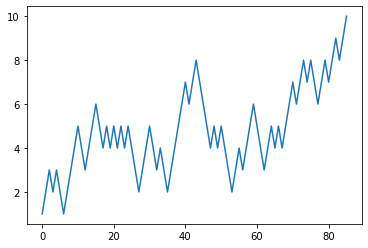

In [3]:
#produce plot to visualize random walk
from matplotlib import pyplot as plt
plt.plot(positions)

Let's turn this into a function.

In [4]:
import random         #import random module

def rw(n):
    '''
    Function to run the random walk simulation.
    Parameter n: the length of the walk
    Return positions: a list of the positions of the random walker
    '''
    positions=[]     #initialize empty list
    pos=0            #initialize position at 0
    
    #while loop to run the random walk
    while True:
        x=random.choice([-1,1])     #make a random choice between 1 or -1
        
        #if statement to determine what to do depending on the random choice
        if x==1:     #if x is 1
            pos+=1   #move forward one step by adding 1
            positions.append(pos)  #append the position to the list
        elif x==-1:  #if x is -1
            pos-=1   #move backward one step by subtracting 1
            positions.append(pos)  #append the position to the list
        
        #if statement to terminate walk when length of walk is reached
        if len(positions) == n:
            break
            
    return positions   #returns list of positions

In [5]:
test1=rw(10)    #tests out rw with n=10
test1

[-1, 0, 1, 2, 1, 0, 1, 2, 1, 2]

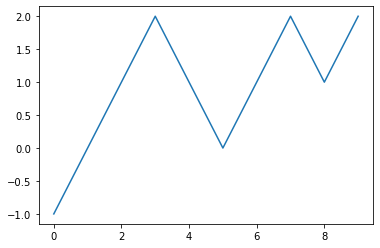

In [6]:
plt.plot(test1)

## Simplified Random Walk

In [7]:
import numpy as np

def rw2(n):
    '''
    Function to run the random walk simulation (with numpy arrays).
    Parameter n: the length of the walk
    Return positions: a list of the positions of the random walker
    '''
    x=np.random.choice(a=[-1,1],size=(n,1))   #makes a random choice between -1 or 1 
    positions=np.concatenate([np.zeros((1,1)),x]).cumsum(0)  #adds to position and concatenates to list
    
    return positions   #returns list of positions

In [8]:
test2=rw2(10)     #tests out rw2 with n=10
test2

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

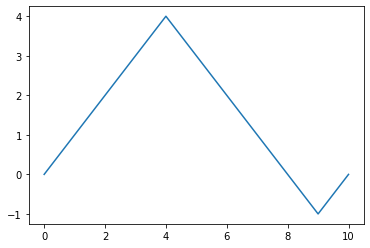

In [9]:
plt.plot(test2)

Let's test which function performs faster. 

In [10]:
%timeit rw(10000)      #find time of rw with n=10000
%timeit rw2(10000)     #find time of rw2 with n=10000

6.3 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
105 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The rw2 function performs significantly faster than the rw function. However, the rw function is easier to read and write. The rw function shows how the random walk is executed (shown from the while loop). With the rw2 function, it is much more condensed (3 lines). It takes more time to process what the lines are calculating.